0.28917373597926255 0.3290614011921177 [ 0.         -0.022636    0.24959834]


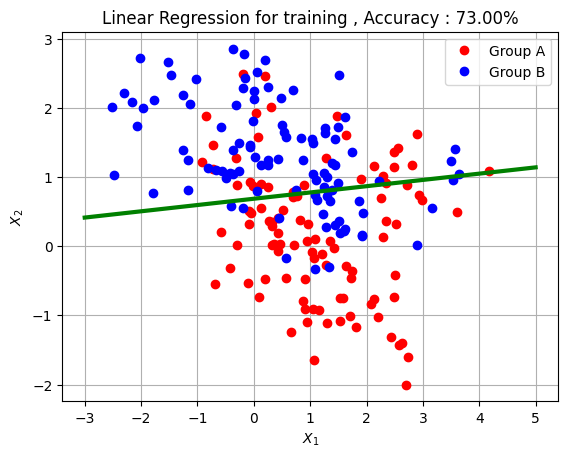

In [2]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. load data
data_dir = 'C:\statcomp\ml_data'
D = np.loadtxt(data_dir + '\la_3.txt', comments='%')

Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], 'ro', label = 'Group A')
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],'bo', label = 'Group B')
plt.legend(), plt.grid(True)
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')

n = len(D[:, 0]) 
X = np.hstack((np.ones((n, 1)), D[:, 0:2])) #建立計算矩陣
y = D[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array([-3, 5]) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
plt.plot(x, f, lw=3 ,color = 'green')

# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Linear Regression for training , Accuracy : {:.2f}%'.format( 100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
plt.show()

plt.savefig('statcomp_hw4_plot1.eps')

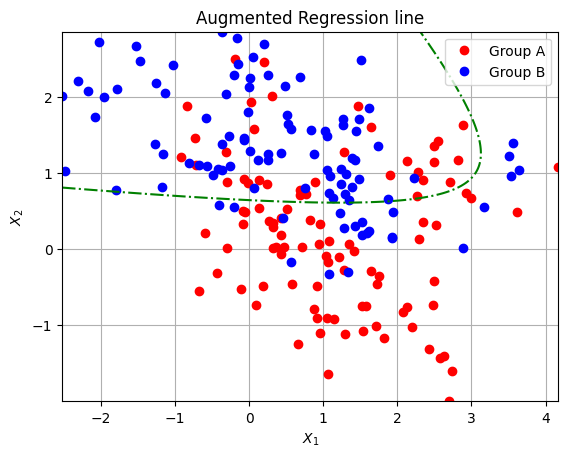

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA

data_dir = 'C:\statcomp\ml_data'
D = np.loadtxt(data_dir + '\la_3.txt', comments='%')
Idx = (D[:,2]==0)
plt.plot(D[Idx, 0], D[Idx, 1], 'ro', label = 'Group A')
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],'bo', label = 'Group B')
plt.legend(), plt.grid(True)
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')

n = len(D[:, 0]) 
# Augmented regression line by a contour line at 0.5
x = np.array([-3, 5]) #直線範圍
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
b = LA.pinv(X) @ y # pseudo inverse
f = (
lambda x: b[0]
+ b[1] * x[0]
+ b[2] * x[1]
+ b[3] * x[0] * x[1]
+ b[4] * x[0] ** 2
+ b[5] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X, Y = np.meshgrid(xx, yy)
Z = f([X, Y])
contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='-.')
#y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
#y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.title('Augmented Regression line')
#print(100 * np.mean(y_pre == y))
plt.show()

plt.savefig('statcomp_hw4_plot2.eps')